# Первое знакомство с NumPy, SciPy и Matplotlib (Версия для Python 3)

## Numpy

In [1]:
import numpy as np

In [2]:
x = [2, 3, 4, 6]
y = np.array(x)

In [3]:
print(type(x), x)
print(type(y), y)

<class 'list'> [2, 3, 4, 6]
<class 'numpy.ndarray'> [2 3 4 6]


In [4]:
print(x[1:3])

[3, 4]


In [5]:
print(y[1:3])

[3 4]


In [6]:
print(x[[0, 2]])

TypeError: list indices must be integers or slices, not list

In [7]:
print(y[[0, 2]])

[2 4]


In [8]:
print(y[y>3])

[4 6]


In [9]:
print(x * 5)

[2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6]


In [10]:
print(y * 5)

[10 15 20 30]


In [11]:
print(x ** 2)

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [12]:
print(y ** 2)

[ 4  9 16 36]


In [13]:
matrix = [[1, 2, 4], [3, 1, 0]]
nd_array = np.array(matrix)

In [14]:
print(matrix[1][2])

0


In [15]:
print(nd_array[1, 2])

0


In [16]:
print(np.random.rand())

0.49702520669639116


In [17]:
print(np.random.randn())

0.9227448400240654


In [18]:
print(np.random.randn(4))

[-0.79060559 -1.08945328 -1.66447451  0.68909602]


In [19]:
print(np.random.randn(4, 5))

[[ 0.21693687  1.10309536  0.08405166 -1.01234026  1.10537071]
 [ 0.6912113  -0.66112792 -0.81233881 -3.15954229 -1.68774684]
 [-1.62550522 -0.9831961   0.64431011  0.56912704  1.7100382 ]
 [-1.06965085  1.53623137  0.49168995 -0.66442272 -0.30231722]]


In [20]:
print(np.arange(0, 8, 0.1))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9]


In [21]:
print(range(0, 8, 0.1))

TypeError: 'float' object cannot be interpreted as an integer

In [22]:
%timeit np.arange(0, 10000)
%timeit range(0, 10000)

6.04 µs ± 40.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
175 ns ± 2.45 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


## SciPy

In [23]:
from scipy import optimize

In [24]:
def f(x):
    return (x[0] - 3.2) ** 2 + (x[1] - 0.1) ** 2 + 3

print(f([3.2, 0.1]))

3.0


In [25]:
x_min = optimize.minimize(f, [5, 5])
print(x_min)

      fun: 3.0000000000011435
 hess_inv: array([[ 0.94055055, -0.16183475],
       [-0.16183475,  0.55944947]])
      jac: array([-2.05636024e-06,  5.36441803e-07])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([3.19999896, 0.10000026])


In [26]:
print(x_min.x)

[3.19999896 0.10000026]


In [27]:
from scipy import linalg

In [28]:
a = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])

x = linalg.solve(a, b)
print(x)

[ 2. -2.  9.]


In [29]:
print(np.dot(a, x))

[ 2.  4. -1.]


In [30]:
X = np.random.randn(4, 3)
U, D, V = linalg.svd(X)
print(U.shape, D.shape, V.shape)
print(type(U), type(D), type(V))

(4, 4) (3,) (3, 3)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


## Matplotlib

In [31]:
%matplotlib inline

Matplotlib is building the font cache using fc-list. This may take a moment.


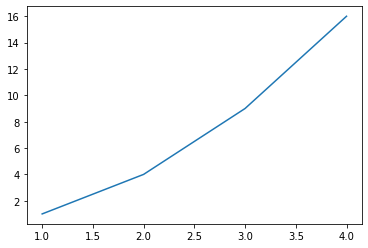

In [32]:
from matplotlib import pylab as plt

plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

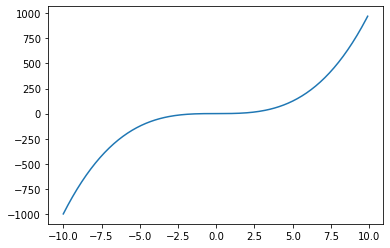

In [33]:
x = np.arange(-10, 10, 0.1)
y = x ** 3
plt.plot(x, y)
plt.show()

## Все вместе

In [34]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [35]:
x = np.arange(0, 10, 2)
y = np.exp(-x/3.0) + np.random.randn(len(x)) * 0.05

print(x[:5])
print(y[:5])

[0 2 4 6 8]
[1.07646997 0.50066556 0.28226191 0.11975914 0.06757157]


In [36]:
f = interpolate.interp1d(x, y, kind='quadratic')
xnew = np.arange(0, 8, 0.1)
ynew = f(xnew)

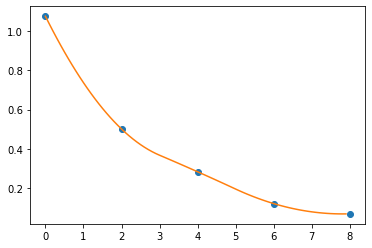

In [37]:
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()